This part is based on the first part. Here, it will be used new subsets uploaded before.

# Preprocessing

In [1]:
from google.colab import files

# This will prompt you to upload a file
uploaded = files.upload()

Saving Bâtiments_industriels.xlsx to Bâtiments_industriels.xlsx


In [40]:
import pandas as pd

# Load the CSV file into a DataFrame
df_batiment_industriels_initial = pd.read_excel('Bâtiments_industriels.xlsx')

In [42]:
df_batiment_industriels = df_batiment_industriels_initial

# Energy Type/Source

Mainly, this analysis will focus on industrial buildings.

**Source d’énergie / de chaleur pour le chauffage 1 (GENH1)**

In [43]:
import pandas as pd

# Example: Load your dataset
# df_batiment_industriels = pd.read_csv("your_dataset.csv")

# Unique values for communes (GGDENAME) and heating types (GENH1)
communes = df_batiment_industriels["GGDENAME"].unique()  # Get all unique communes
heating_types = [
    7500, 7501, 7510, 7511, 7512, 7513, 7520, 7530, 7540, 7541, 7542, 7543,
    7550, 7560, 7570, 7580, 7581, 7582, 7598, 7599
]

# Initialize a DataFrame with communes as rows and heating types as columns
market_analytics_industry_build = pd.DataFrame(0, index=communes, columns=heating_types)

# Fill the market analytics dataset
for commune in communes:
    for heating_type in heating_types:
        # Count the occurrences of the heating type in the specific commune
        count = df_batiment_industriels[(df_batiment_industriels["GGDENAME"] == commune) & (df_batiment_industriels["GENH1"] == heating_type)].shape[0]
        market_analytics_industry_build.at[commune, heating_type] = count


# Reset the index to make "GGDENAME" a column if needed
market_analytics_industry_build.reset_index(inplace=True)
market_analytics_industry_build.rename(columns={"index": "Commune"}, inplace=True)

# Save the DataFrame as an Excel file
market_analytics_industry_build.to_excel("GENH1_market_analytics_industry_build.xlsx", index=False)

# Trigger file download (if using Google Colab or similar environments)
files.download("GENH1_market_analytics_industry_build.xlsx")

# Print results (optional)
print("\nMarket analytics dataset:\n", market_analytics_industry_build)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Market analytics dataset:
                   Commune  7500  7501  7510  7511  7512  7513  7520  7530  \
0                   Aigle    13     0     0     0     0     0    24     9   
1                     Bex     9     0     0     0     0     0    18    10   
2                 Chessel     0     0     0     0     0     0     0     0   
3              Corbeyrier     0     0     0     0     0     0     0     0   
4                   Gryon     1     0     0     0     0     0     0     4   
..                    ...   ...   ...   ...   ...   ...   ...   ...   ...   
276  Valeyres-sous-Ursins     0     0     0     0     0     0     0     0   
277        Villars-Epeney     0     0     0     0     0     0     0     0   
278     Vugelles-La Mothe     1     0     0     0     0     0     0     1   
279     Yverdon-les-Bains    10     0     0     0     0     0    62    14   
280               Yvonand     2     0     0     0     0     0     2     7   

     7540  ...  7542  7543  7550  7560  7570  7

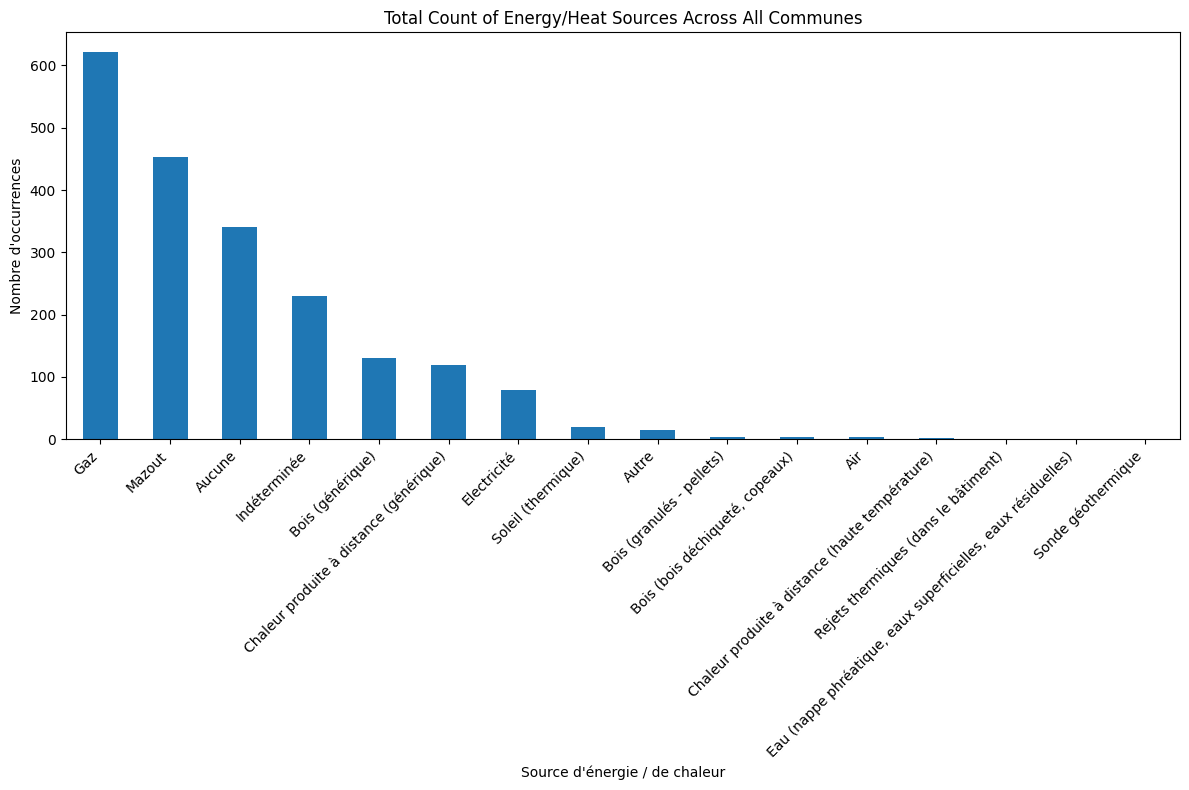

In [45]:
# Reimport libraries
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate data: Count occurrences of each heating type
total_heating_counts = df_batiment_industriels['GENH1'].value_counts()

# Decoding GENH1 using the provided mapping
energy_source_mapping = {
    7500: "Aucune",
    7501: "Air",
    7510: "Géothermie (générique)",
    7511: "Sonde géothermique",
    7512: "Serpentin géothermique",
    7513: "Eau (nappe phréatique, eaux superficielles, eaux résiduelles)",
    7520: "Gaz",
    7530: "Mazout",
    7540: "Bois (générique)",
    7541: "Bois (bûches)",
    7542: "Bois (granulés - pellets)",
    7543: "Bois (bois déchiqueté, copeaux)",
    7550: "Rejets thermiques (dans le bâtiment)",
    7560: "Electricité",
    7570: "Soleil (thermique)",
    7580: "Chaleur produite à distance (générique)",
    7581: "Chaleur produite à distance (haute température)",
    7582: "Chaleur produite à distance (basse température)",
    7598: "Indéterminée",
    7599: "Autre"
}

# Rename GENH1 codes to descriptive names
decoded_heating_counts = total_heating_counts.rename(index=energy_source_mapping)

# Plot the data
plt.figure(figsize=(12, 8))
decoded_heating_counts.sort_values(ascending=False).plot(kind='bar')
plt.title("Total Count of Energy/Heat Sources Across All Communes")
plt.xlabel("Source d'énergie / de chaleur")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# decoded_heating_counts => it's the statistics without visualization

**Générateur de chaleur pour le chauffage 1 (GWAERZH1)**

In [47]:
import pandas as pd

# Example: Load your dataset
# df_batiment_industriels = pd.read_csv("your_dataset.csv")

# Unique values for communes (GGDENAME) and generator types (GWAERZH1)
communes = df_batiment_industriels["GGDENAME"].unique()  # Get all unique communes
generator_types = [
    7400, 7410,7411,7420,7421,7430,7431,7432,7433,7434,7435,7436,7450,7451,7452,7460,7461,7499
]

# Initialize a DataFrame with communes as rows and heating types as columns
market_analytics_industry_build_2 = pd.DataFrame(0, index=communes, columns=generator_types)

# Fill the market analytics dataset
for commune in communes:
    for generator_type in generator_types:
        # Count the occurrences of the heating type in the specific commune
        count = df_batiment_industriels[(df_batiment_industriels["GGDENAME"] == commune) & (df_batiment_industriels["GWAERZH1"] == generator_type)].shape[0]
        market_analytics_industry_build_2.at[commune, generator_type] = count

# Reset the index to make "GGDENAME" a column if needed
market_analytics_industry_build_2.reset_index(inplace=True)
market_analytics_industry_build_2.rename(columns={"index": "Commune"}, inplace=True)

# Save the DataFrame as an Excel file
market_analytics_industry_build_2.to_excel("GWAERZH1_market_analytics_industry_build_Vaud.xlsx", index=False)

# Trigger file download (if using Google Colab or similar environments)
files.download("GWAERZH1_market_analytics_industry_build_Vaud.xlsx")

# Print results (optional)
print("\nMarket analytics dataset:\n", market_analytics_industry_build_2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Market analytics dataset:
                   Commune  7400  7410  7411  7420  7421  7430  7431  7432  \
0                   Aigle    13    13     0     0     0    27     4     0   
1                     Bex     9     8     0     0     0    30     0     0   
2                 Chessel     0     0     0     0     0     0     0     0   
3              Corbeyrier     0     0     0     0     0     0     0     0   
4                   Gryon     1     0     0     0     0     5     0     0   
..                    ...   ...   ...   ...   ...   ...   ...   ...   ...   
276  Valeyres-sous-Ursins     0     0     0     0     0     0     0     0   
277        Villars-Epeney     0     0     0     0     0     0     0     0   
278     Vugelles-La Mothe     1     0     0     0     0     1     0     0   
279     Yverdon-les-Bains    10     9     1     2     0    65     6     1   
280               Yvonand     2     0     0     0     0     9     0     0   

     7433  7434  7435  7436  7450  7451  7452  

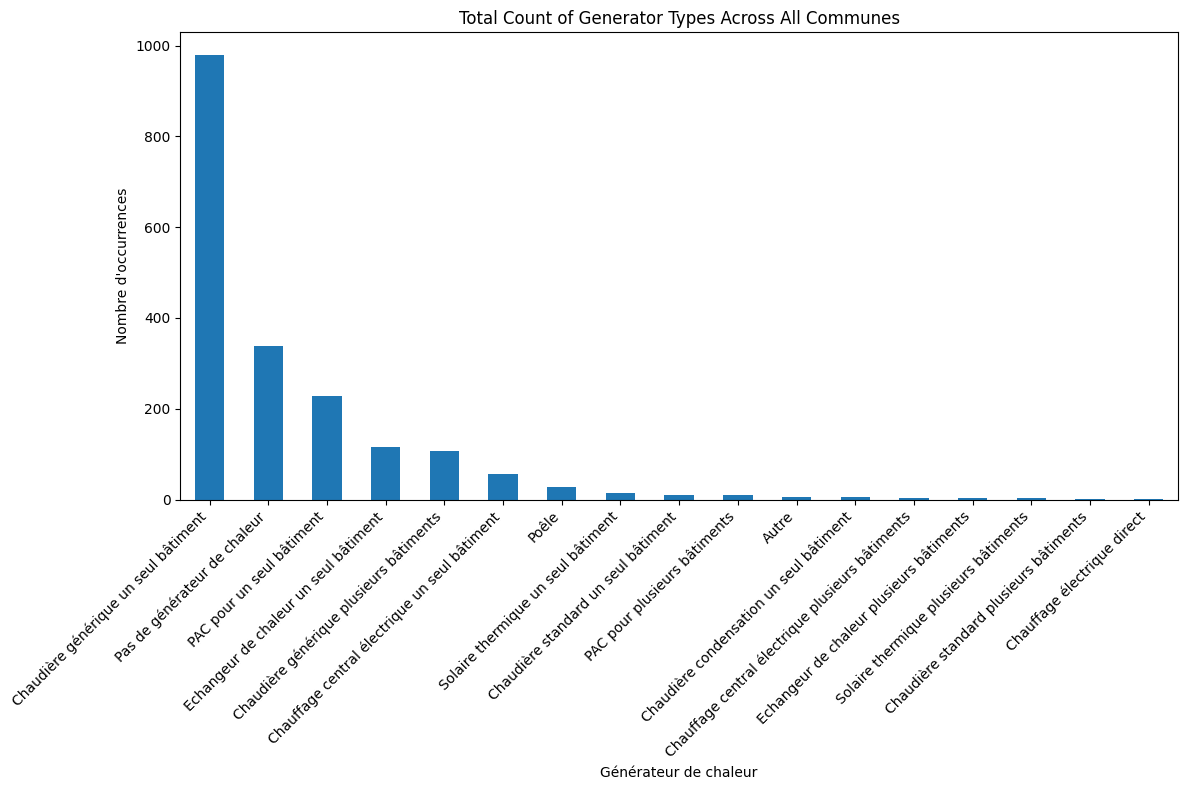

In [28]:
# Aggregate data: Count occurrences of each generator type (GWAERZH1)
total_generator_counts = df_batiment_industriels['GWAERZH1'].value_counts()

# Decoding GWAERZH1 codes
generator_type_mapping = {
    7400: "Pas de générateur de chaleur",
    7410: "PAC pour un seul bâtiment",
    7411: "PAC pour plusieurs bâtiments",
    7420: "Solaire thermique un seul bâtiment",
    7421: "Solaire thermique plusieurs bâtiments",
    7430: "Chaudière générique un seul bâtiment",
    7431: "Chaudière générique plusieurs bâtiments",
    7432: "Chaudière standard un seul bâtiment",
    7433: "Chaudière standard plusieurs bâtiments",
    7434: "Chaudière condensation un seul bâtiment",
    7435: "Chaudière condensation plusieurs bâtiments",
    7436: "Poêle",
    7440: "Couplage chaleur-force un seul bâtiment",
    7441: "Couplage chaleur-force plusieurs bâtiments",
    7450: "Chauffage central électrique un seul bâtiment",
    7451: "Chauffage central électrique plusieurs bâtiments",
    7452: "Chauffage électrique direct",
    7460: "Echangeur de chaleur un seul bâtiment",
    7461: "Echangeur de chaleur plusieurs bâtiments",
    7499: "Autre"
}

# Rename GWAERZH1 codes to descriptive names
decoded_generator_counts = total_generator_counts.rename(index=generator_type_mapping)

# Plot the data
plt.figure(figsize=(12, 8))
decoded_generator_counts.sort_values(ascending=False).plot(kind='bar')
plt.title("Total Count of Generator Types Across All Communes")
plt.xlabel("Générateur de chaleur")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Générateur de chaleur pour l'eau chaude 1 (GWAERZW1)**

In [15]:
import pandas as pd

# Example: Load your dataset
# df_batiment_industriels = pd.read_csv("your_dataset.csv")

# Unique values for communes (GGDENAME) and generator types (GWAERZW1)
communes = df_batiment_industriels["GGDENAME"].unique()  # Get all unique communes
generator_types = df_batiment_industriels["GWAERZW1"].unique()

# Initialize a DataFrame with communes as rows and heating types as columns
market_analytics_industry_build_3 = pd.DataFrame(0, index=communes, columns=generator_types)

# Fill the market analytics dataset
for commune in communes:
    for generator_type in generator_types:
        # Count the occurrences of the heating type in the specific commune
        count = df_batiment_industriels[(df_batiment_industriels["GGDENAME"] == commune) & (df_batiment_industriels["GWAERZW1"] == generator_type)].shape[0]
        market_analytics_industry_build_3.at[commune, generator_type] = count

# Reset the index to make "GGDENAME" a column if needed
market_analytics_industry_build_3.reset_index(inplace=True)
market_analytics_industry_build_3.rename(columns={"index": "Commune"}, inplace=True)

# Save the DataFrame as an Excel file
market_analytics_industry_build_3.to_excel("GWAERZW1_market_analytics_industry_build_Vaud.xlsx", index=False)

# Trigger file download (if using Google Colab or similar environments)
files.download("GWAERZW1_market_analytics_industry_build_Vaud.xlsx")

# Print results (optional)
print("\nMarket analytics dataset:\n", market_analytics_industry_build_3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Market analytics dataset:
                Commune  7600.0  7650.0  7630.0  7620.0  7610.0  7660.0  \
0                Aigle     134       5      23      13       8       0   
1                  Bex     148       7      20       9       5       2   
2              Chessel       4       0       0       0       0       0   
3           Corbeyrier       1       0       0       0       0       0   
4                Gryon      31       3       3       0       0       0   
..                 ...     ...     ...     ...     ...     ...     ...   
277     Villars-Epeney       1       0       0       0       0       0   
278  Vugelles-La Mothe       4       1       0       0       0       0   
279  Yverdon-les-Bains     216       9      47      17      10       4   
280            Yvonand      27       2       7       1       0       1   
281                NaN       0       0       0       0       0       0   

     7699.0  NaN  7632.0  7634.0  
0         0    0       0       0  
1         0  

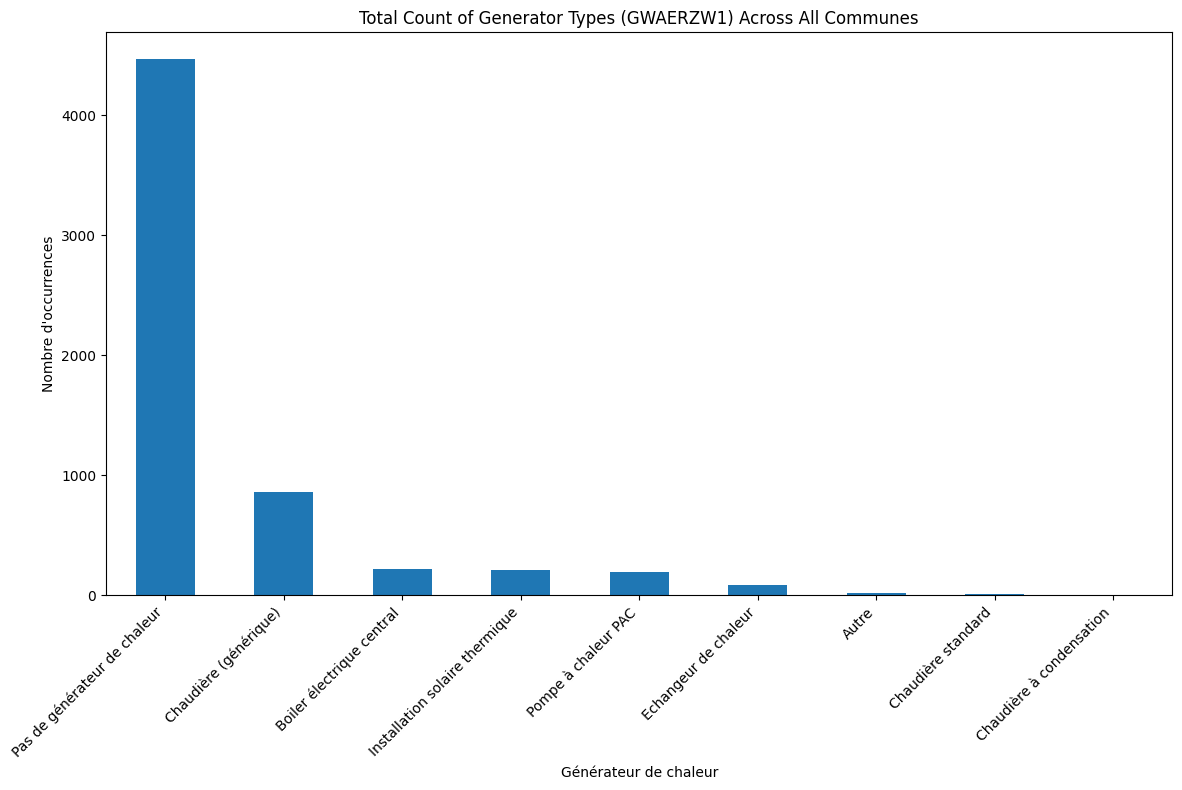

In [29]:
# Aggregate data: Count occurrences of each generator type (GWAERZW1)
total_generator_counts = df_batiment_industriels['GWAERZW1'].value_counts()

# Decoding GWAERZW1 codes
generator_type_mapping = {
    7600: "Pas de générateur de chaleur",
    7610: "Pompe à chaleur PAC",
    7620: "Installation solaire thermique",
    7630: "Chaudière (générique)",
    7632: "Chaudière standard",
    7634: "Chaudière à condensation",
    7640: "Installation couplage chaleur-force",
    7650: "Boiler électrique central",
    7651: "Petit boiler",
    7660: "Echangeur de chaleur",
    7699: "Autre"
}

# Rename GWAERZW1 codes to descriptive names
decoded_generator_counts = total_generator_counts.rename(index=generator_type_mapping)

# Plot the data
plt.figure(figsize=(12, 8))
decoded_generator_counts.sort_values(ascending=False).plot(kind='bar')
plt.title("Total Count of Generator Types (GWAERZW1) Across All Communes")
plt.xlabel("Générateur de chaleur")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Source d’énergie / de chaleur pour l'eau chaude 1 (GENW1)**

In [16]:
import pandas as pd

# Example: Load your dataset
# df_batiment_industriels = pd.read_csv("your_dataset.csv")

# Unique values for communes (GGDENAME) and heating types (GENW1)
communes = df_batiment_industriels["GGDENAME"].unique()  # Get all unique communes
heating_types = df_batiment_industriels["GENW1"].unique()

# Initialize a DataFrame with communes as rows and heating types as columns
market_analytics_industry_build_4 = pd.DataFrame(0, index=communes, columns=heating_types)

# Fill the market analytics dataset
for commune in communes:
    for heating_type in heating_types:
        # Count the occurrences of the heating type in the specific commune
        count = df_batiment_industriels[(df_batiment_industriels["GGDENAME"] == commune) & (df_batiment_industriels["GENW1"] == heating_type)].shape[0]
        market_analytics_industry_build_4.at[commune, heating_type] = count

# Reset the index to make "GGDENAME" a column if needed
market_analytics_industry_build_4.reset_index(inplace=True)
market_analytics_industry_build_4.rename(columns={"index": "Commune"}, inplace=True)

# Save the DataFrame as an Excel file
market_analytics_industry_build_4.to_excel("GENW1_market_analytics_industry_build_Vaud.xlsx", index=False)

# Trigger file download (if using Google Colab or similar environments)
files.download("GENW1_market_analytics_industry_build_Vaud.xlsx")

# Print results (optional)
print("\nMarket analytics dataset:\n", market_analytics_industry_build_4)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Market analytics dataset:
                Commune  7500.0  7560.0  7530.0  7520.0  7570.0  7540.0  \
0                Aigle     134       5       5      16      13       2   
1                  Bex     148       7       8      10       9       2   
2              Chessel       4       0       0       0       0       0   
3           Corbeyrier       1       0       0       0       0       0   
4                Gryon      31       3       3       0       0       0   
..                 ...     ...     ...     ...     ...     ...     ...   
277     Villars-Epeney       1       0       0       0       0       0   
278  Vugelles-La Mothe       4       1       0       0       0       0   
279  Yverdon-les-Bains     216       9      14      34      17       0   
280            Yvonand      27       2       5       2       1       0   
281                NaN       0       0       0       0       0       0   

     7598.0  7580.0  7599.0  7501.0  7550.0  NaN  7542.0  7543.0  7513.0  \
0      

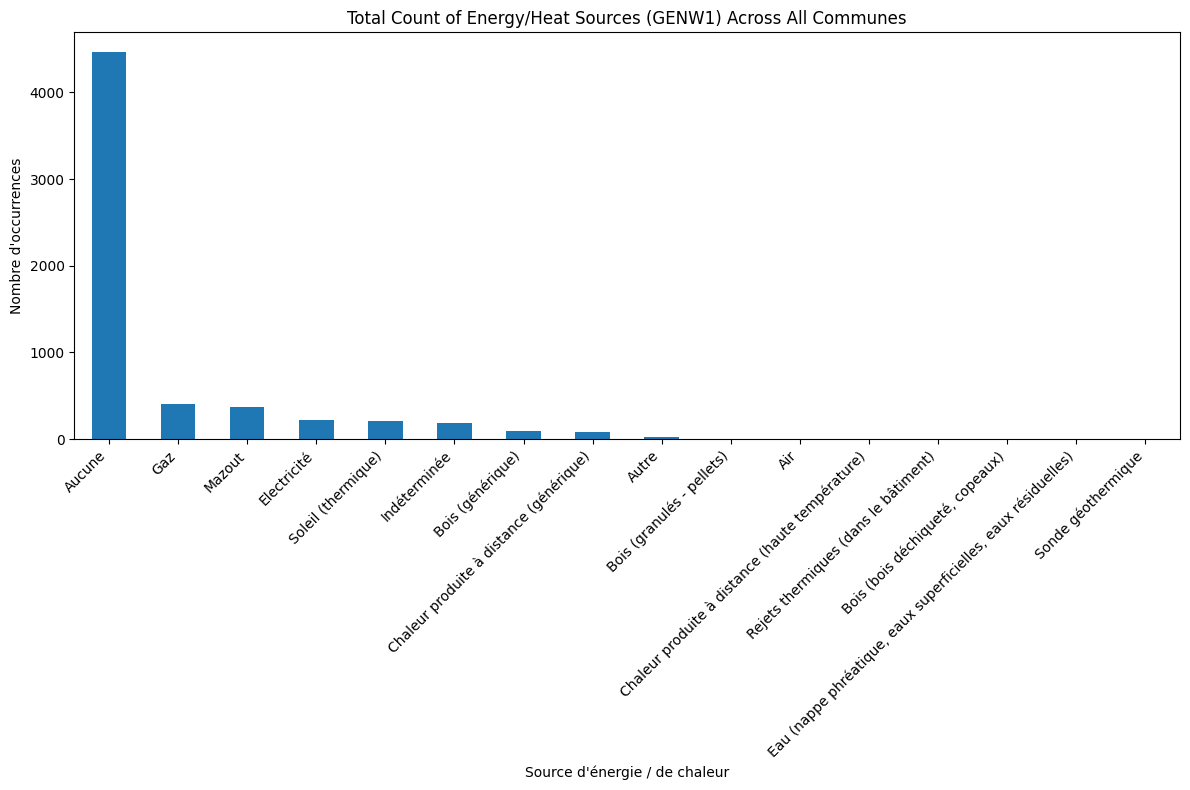

In [30]:
# Aggregate data: Count occurrences of each heating type (GENW1)
total_heating_counts_genw1 = df_batiment_industriels['GENW1'].value_counts()

# Decoding GENW1 codes
heating_type_mapping = {
    7500: "Aucune",
    7501: "Air",
    7510: "Géothermie (générique)",
    7511: "Sonde géothermique",
    7512: "Serpentin géothermique",
    7513: "Eau (nappe phréatique, eaux superficielles, eaux résiduelles)",
    7520: "Gaz",
    7530: "Mazout",
    7540: "Bois (générique)",
    7541: "Bois (bûches)",
    7542: "Bois (granulés - pellets)",
    7543: "Bois (bois déchiqueté, copeaux)",
    7550: "Rejets thermiques (dans le bâtiment)",
    7560: "Electricité",
    7570: "Soleil (thermique)",
    7580: "Chaleur produite à distance (générique)",
    7581: "Chaleur produite à distance (haute température)",
    7582: "Chaleur produite à distance (basse température)",
    7598: "Indéterminée",
    7599: "Autre"
}

# Rename GENW1 codes to descriptive names
decoded_heating_counts_genw1 = total_heating_counts_genw1.rename(index=heating_type_mapping)

# Plot the data
plt.figure(figsize=(12, 8))
decoded_heating_counts_genw1.sort_values(ascending=False).plot(kind='bar')
plt.title("Total Count of Energy/Heat Sources (GENW1) Across All Communes")
plt.xlabel("Source d'énergie / de chaleur")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Commune level

The goal of this section to show that we can extract any commune and create any dataset. The same we can do with other columns.

In [50]:
df_lutry = df_batiment_industriels[df_batiment_industriels['GGDENAME'] == 'Lutry']
df_lutry = df_lutry.reset_index(drop=True)
df_lutry

,EGID,GDEKT,GGDENR,GGDENAME,EGRID,LGBKR,LPARZ,GEBNR,GBEZ,GKODE,...,GENW1,GWAERSCEW1,GWAERDATW1,GWAERZW2,GENW2,GWAERSCEW2,GWAERDATW2,GSTAT_decoded,GKAT_decoded,GKLAS_decoded
0,280002563,VD,5606,Lutry,CH238387459821,0,4283,2958b,NaN,2543551,...,7500.0,869.0,2020-11-30,7600.0,7500.0,869.0,2020-11-30,existant,Bâtiment sans usage d'habitation,Bâtiments industriels
1,280002618,VD,5606,Lutry,CH880783458756,0,3795,2613,NaN,2541669,...,7500.0,869.0,2020-11-30,7600.0,7500.0,869.0,2020-11-30,existant,Bâtiment sans usage d'habitation,Bâtiments industriels
2,280003282,VD,5606,Lutry,CH344583879767,0,4217,3151,NaN,2544025,...,7500.0,869.0,2020-11-30,7600.0,7500.0,869.0,2020-11-30,existant,Bâtiment sans usage d'habitation,Bâtiments industriels
3,280004084,VD,5606,Lutry,CH774587768387,0,176,2011,NaN,2542095,...,7598.0,859.0,2024-08-16,NaN,NaN,NaN,NaN,existant,Bâtiment sans usage d'habitation,Bâtiments industriels
4,280006695,VD,5606,Lutry,CH786883457606,0,1563,1978a,NaN,2543307,...,7500.0,869.0,2020-11-30,7600.0,7500.0,869.0,2020-11-30,existant,Bâtiment sans usage d'habitation,Bâtiments industriels
5,280007474,VD,5606,Lutry,CH428752834583,0,2223,2397,NaN,2542992,...,7500.0,869.0,2020-11-30,7600.0,7500.0,869.0,2020-11-30,existant,Bâtiment sans usage d'habitation,Bâtiments industriels
6,280008537,VD,5606,Lutry,CH714514838741,0,196,1454b,NaN,2542001,...,7500.0,869.0,2020-11-30,7600.0,7500.0,869.0,2020-11-30,existant,Bâtiment sans usage d'habitation,Bâtiments industriels
7,280009100,VD,5606,Lutry,CH374587868396,0,4358,2082a,NaN,2543421,...,7500.0,869.0,2020-11-30,7600.0,7500.0,869.0,2020-11-30,existant,Bâtiment sans usage d'habitation,Bâtiments industriels
8,280009625,VD,5606,Lutry,CH328708834528,0,320,1010c,NaN,2542422,...,7500.0,869.0,2020-11-30,7600.0,7500.0,869.0,2020-11-30,existant,Bâtiment sans usage d'habitation,Bâtiments industriels
9,280010880,VD,5606,Lutry,CH798387144593,0,115,136b,NaN,2542143,...,7500.0,869.0,2020-11-30,7600.0,7500.0,869.0,2020-11-30,existant,Bâtiment sans usage d'habitation,Bâtiments industriels


In [58]:
# Save the DataFrame as an Excel file
df_lutry.to_excel("df_lutry_industrial_buildings.xlsx", index=False)

# Trigger file download (if using Google Colab or similar environments)
files.download("df_lutry_industrial_buildings.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Heat map

In this section, we show how heat map is built. For simplicity and accessibility, we'll focus on a commune level (specifically, Lutry).

In [51]:
import pandas as pd
from pyproj import Transformer
import folium
from folium.plugins import HeatMap
from google.colab import files

# Define the coordinate transformer from LV95 (EPSG:2056) to WGS84 (EPSG:4326)
transformer = Transformer.from_crs("epsg:2056", "epsg:4326", always_xy=True)

# Function to convert Swiss LV95 coordinates to WGS84
def convert_coordinates(row):
    longitude, latitude = transformer.transform(row['GKODE'], row['GKODN'])
    return pd.Series([latitude, longitude], index=['Latitude', 'Longitude'])

# Apply the coordinate conversion to df_lutry
df_lutry[['Latitude', 'Longitude']] = df_lutry.apply(convert_coordinates, axis=1)

# !!!!!!!! LOOK BELOW

# Filter the DataFrame to include only rows where GENH1 == 7530
filtered_df = df_lutry[df_lutry['GENH1'] == 7530].copy()

# Prepare heatmap data: [latitude, longitude, weight]
heat_data = [[row['Latitude'], row['Longitude'], row['GAREA']] for index, row in filtered_df.iterrows()]

# Create a folium map centered around Lutry
lutry_map = folium.Map(location=[46.5074, 6.6831], zoom_start=12)

# Add the heatmap to the map
HeatMap(heat_data).add_to(lutry_map)

# Save the map as an HTML file
lutry_map_path = "/content/lutry_heatmap.html"
lutry_map.save(lutry_map_path)

# To download the file (if using Google Colab)
files.download(lutry_map_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

When we include only specific rows, it means that we are taking specific source of energy. For example, above 7530 code == Mazut.

# Google Maps API

Example of the code below (SAMPLE)

It's also important to have transferred data from our RegBL dataset as initially it's in another format. *(For a Lutry case, it's transferred here.)*

In [ ]:
import pandas as pd
import requests
import googlemaps

# Google API Key (replace 'YOUR_API_KEY' with your actual key)
API_KEY = "YOUR_API_KEY"
gmaps = googlemaps.Client(key=API_KEY)

# Load the dataset
file_path = 'your_dataset_file.csv'  # Path to your dataset
data = pd.read_csv(file_path)

# Define a function to reverse geocode and search places
def get_place_details(lat, lng):
    # Reverse Geocoding to get address
    reverse_geocode_result = gmaps.reverse_geocode((lat, lng))
    address = reverse_geocode_result[0]['formatted_address'] if reverse_geocode_result else "N/A"

    # Nearby Search for businesses or buildings
    places_result = gmaps.places_nearby(location=(lat, lng), radius=50, type="establishment")  # Change type as needed
    place_name = places_result['results'][0]['name'] if places_result['results'] else "N/A"

    return address, place_name

# Apply the function to dataset
addresses = []
places = []

for _, row in data.iterrows():
    lat, lng = row['Latitude'], row['Longitude']
    address, place_name = get_place_details(lat, lng)
    addresses.append(address)
    places.append(place_name)

# Append results to dataframe
data['Address'] = addresses
data['Place_Name'] = places

# Save the enriched dataset
data.to_csv('enriched_dataset.csv', index=False)
print("Data saved to enriched_dataset.csv")

# Other